In [138]:
import numpy as np
import matplotlib.pyplot as plt

def fig():
    plt.figure(figsize=(13,7))

# PV177: Experimental Data Modelling

## Aleš Křenek, autumn 2020

### Linear and non-linear models

# Once upon a time ...

... men were real men, small furry creatures from Alpha Centauri were real small furry creatures from Alpha Centauri, the world was explainable, and all models were linear

Later on, deep neural networks were invented ...

For the time being, let's enjoy the nice linear world. 

*Most of this lecture was inspired by PSU course https://online.stat.psu.edu/stat501/*

# LINE principle

* **Linear Function:** The mean of the response, $E(y_i)$, at each value of the predictor, $x_i$, is a Linear function of $x_i$
* **Independent:** The errors, $\epsilon_i$ are independent
* **Normally Distributed:** The errors, $\epsilon_i$, at each value of the predictor, $x_i$, are normally distributed.
* **Equal variances:**  The errors, $\epsilon_i$, at each value of the predictor $x_i$ have equal variances $\sigma^2$ 

Under these assumptions all the following holds.

# Simple linear regression

* Assuming the model 
$$ \hat y = b_0 + b_1 x$$
* least squares produces
$$ b_1 = \frac { \sum (x_i - \bar x) (y_i - \bar y)} { \sum (x_i - \bar x)^2 } \qquad b_0 = \bar y - b_1 \bar x$$
* The principal question: **Is there a linear relationship in my data?**
  * Visual inspection
  * t-test for $H_0: b_1 = 0$
  * f-test for $H_0: b_1 = 0$
  * assessment of LINE (including lack-of-fit test for linearity)

# Alcohol comsumption vs. arm strength 

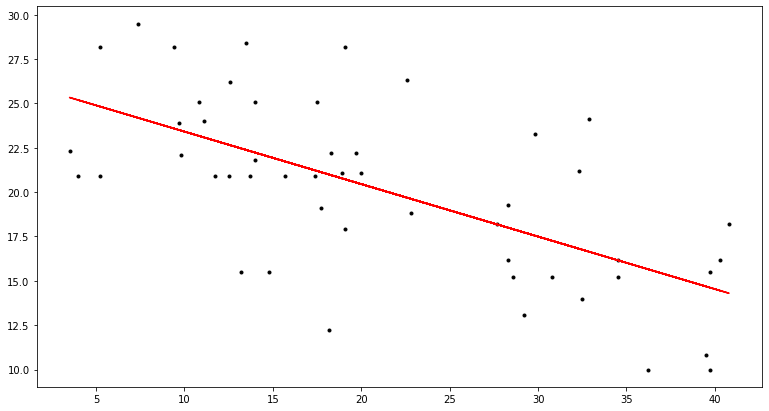

In [139]:
alco=np.loadtxt('alcoholarm.txt',skiprows=1,delimiter='\t')
mean=np.sum(alco,axis=0) / alco.shape[0]
x=alco[:,0]
y=alco[:,1]
b1=np.sum((x-mean[0])*(y-mean[1]))/np.sum((x-mean[0])**2)
b0=mean[1]-b1*mean[0]
fig()
plt.scatter(x,y,marker='.',c='black')
plt.plot(x,b0+b1*x,c='red')
plt.show()

# t-test of the linear model

* model mean square error 
$$ MSE = \frac{\sum (y_i - \hat y_i)^2}  { N - 2} $$
* predictor variance 
$$ \sigma^2 = {\sum (x_i - \bar x)^2} $$
* t-statistic of $b_0$ wrt. null hypothesis $\beta$
$$ t = \frac {b_0  - \beta} { \frac{\sqrt{MSE} }{ \sigma } } $$

In [140]:
ymod=b0+b1*x
mse=np.sum((y-ymod)**2)/(len(x)-2)
varx=np.sum((x-mean[0])**2)
se = np.sqrt(mse)/np.sqrt(varx)
tstat=b1 / se
tstat

-5.795676282643862

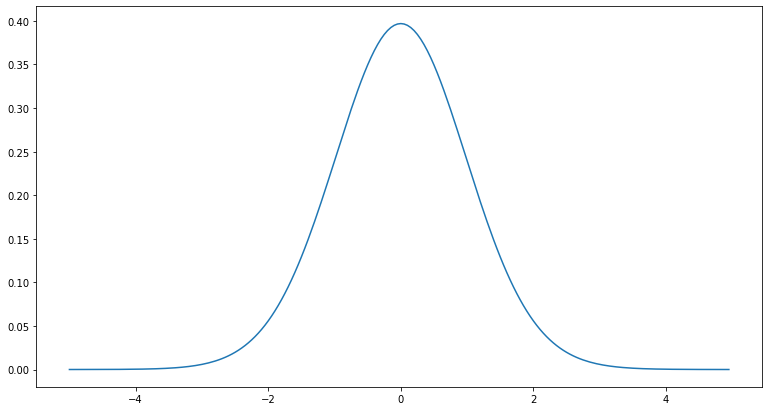

5.136093184088253e-07

In [141]:
from scipy.stats import t
fig()
aux = np.arange(-5,5,.05)
plt.plot(aux,t.pdf(aux,len(x)-2))
plt.show()

pt = 2.*(1.-t.cdf(np.abs(tstat),len(x)-2)) # two tailed, not equal to alternative hypothesis
pt

# f-test of the linear model
* regression mean square error
$$ MSR = \frac { \sum (\hat y_i - \bar y)^2} 1 $$
* f-statistic
$$ f = \frac { MSR } { MSE } $$
* averages of many samples drawn from the same population are
$$ E(MSR) = \sigma^2 + b_1^2 \sum (x_i - \bar x)^2 \qquad E(MSE) = \sigma^2 $$
* therefore, if $b_1 = 0$, $f$ should be 1

In [142]:
from scipy.stats import f
msr = np.sum((ymod - mean[1])**2)
fstat = msr/mse
pf = 1.-f.cdf(fstat,len(x)-2,1)
print("f = ",fstat, " p = ",pf)

f =  33.58986357320058  p =  0.13626340340644516


# Coefficient of determination


In [143]:
def r2(x,y,f):
    mean = np.sum(y) / y.shape
    yres = y - mean
    s_tot = np.sum(yres * yres)
    res = y - f
    s_res = np.sum(res * res)
    r2 = 1 - s_res/s_tot
    return r2

In [144]:
r2(x,y,ymod)

0.41169162567681583

# Residual vs. fits plot

* helps to check LINE (linear model; independent, normal, equal error)

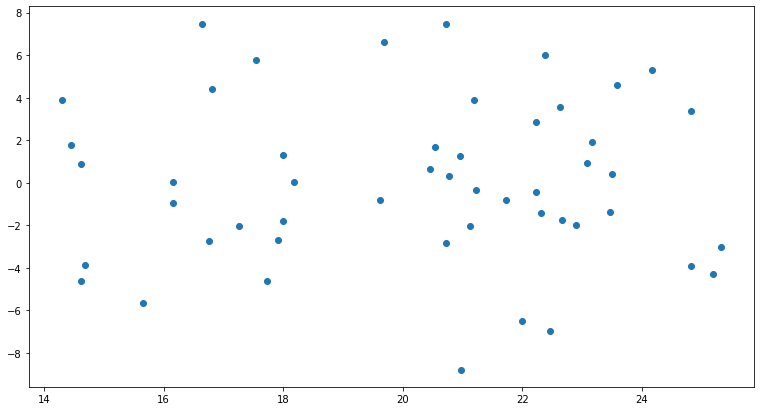

In [145]:
res = y - ymod
fig()
plt.scatter(ymod,res)
plt.show()

* random distribution around 0 -- linear model seems to be good
* horizontal band filled uniformly -- equal error distribution

# Residuals vs. predictor plot

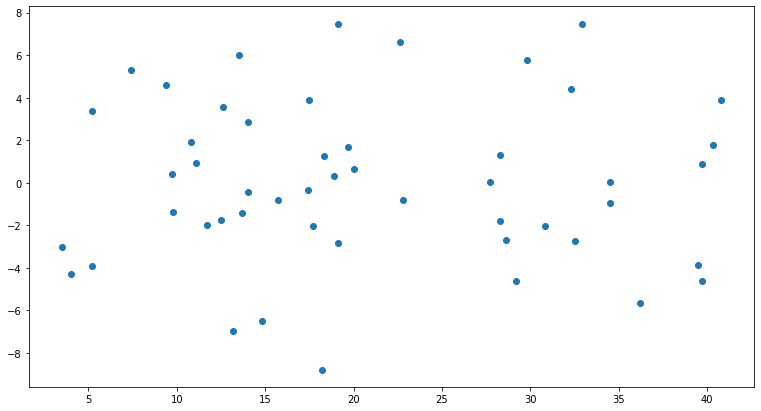

In [146]:
fig()
plt.scatter(x,res)
plt.show()

* random distribution around 0 -- the error is independent
* visible trend would suggest another predictor to be added

# Residuals vs. order plot

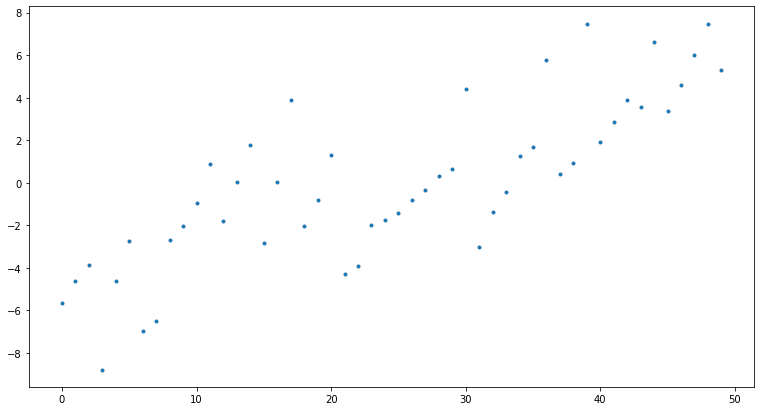

In [147]:
fig()
plt.plot(res,marker='.',ls='')
plt.show()

* visible trend suggests lack of independence of the error

# Residuals histogram

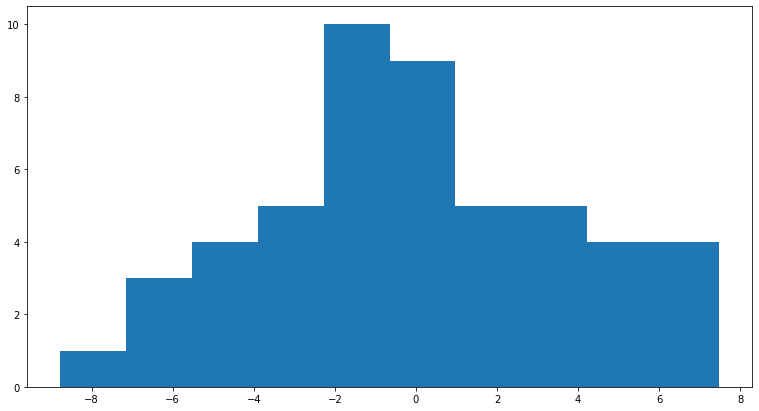

In [148]:
fig()
plt.hist(res)
plt.show()

* ideally, it should follow gaussian (normal distribution)
* possible artifacts: outliers, skewed distribution, heavy tail

# Lack-of-fit test
* multiple measurements for single predictor values are required
* lack of fit mean square 
$$MSLF = \frac { m \sum_{i=1}^n(\hat y_{i} - \bar y_i)^2)} {m - 2} $$
* pure error mean square
$$MSPE = \frac { \sum_{i=1}^n\sum_{j=1}^m (y_{ij} - \bar y_i)^2} { m(n-1) } $$
* f-statistic
$$ f = \frac{MSLF} {MSPE}$$
* $H_0$: the model is correct, there is no lack of fit
* f-distribution of $(m-2,m(n-1))$ DOF -- probability to see this data provided $H_0$ holds, therefore
$$ p = 1 - fcdf(f,m-2,m(n-1)) $$


# Data transformations
* not everything in the world is linear
* linear relationships can be still "hidden" behind "wrong units"
* e.g. in exponential decay 
$$ N = N_0 e^{-t/T} $$
* $t, N$ are not in linear relationship
* however, $\ln N$ and $t$ are
* the right transformation must be discovered by guess, trial and error
* good candidates are logarithm, reciprocal, and power of either predictor or response

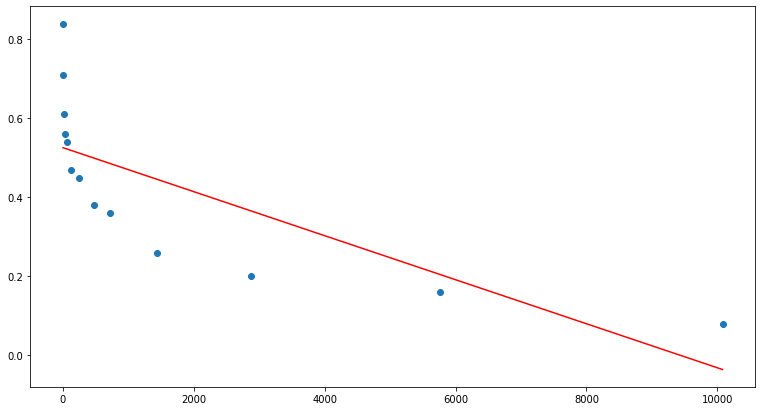

In [149]:
recall = np.loadtxt('wordrecall.txt',skiprows=1,delimiter='\t')
time=recall[:,0]
prop=recall[:,1]
tm = np.sum(time)/len(time)
pm = np.sum(prop)/len(time)
r1=np.sum((time-tm)*(prop-pm))/np.sum((time-tm)**2)
r0=pm-r1*tm
mod=r0 + r1*time
fig()
plt.plot(time,mod,c='red')
plt.scatter(time,prop)
plt.show()

In [150]:
r2(time,prop,mod)

0.5708584468698246

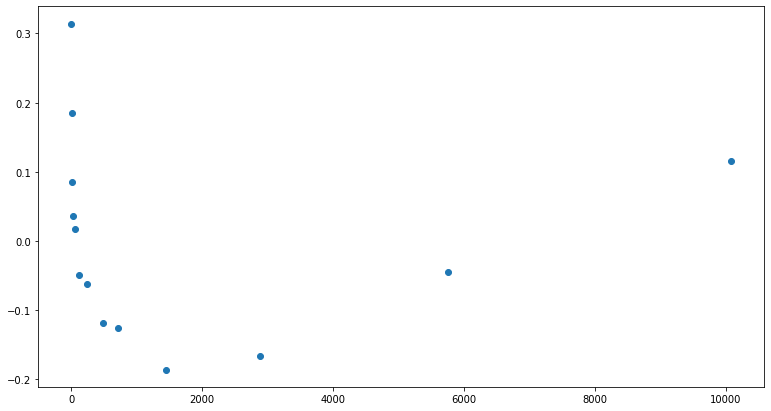

In [151]:
res=prop-mod
fig()
#plt.scatter(prop,res)
plt.scatter(time,res)
plt.show()

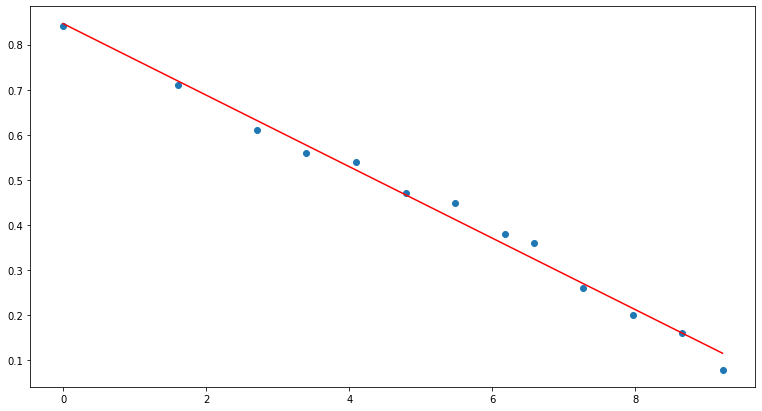

0.9898776436636187

In [152]:
logtime=np.log(time)
tm = np.sum(logtime)/len(logtime)
pm = np.sum(prop)/len(logtime)
logr1=np.sum((logtime-tm)*(prop-pm))/np.sum((logtime-tm)**2)
logr0=pm-logr1*tm
logmod=logr0 + logr1*logtime
fig()
plt.plot(logtime,logmod,c='red')
plt.scatter(logtime,prop)
plt.show()
r2(logtime,prop,logmod)

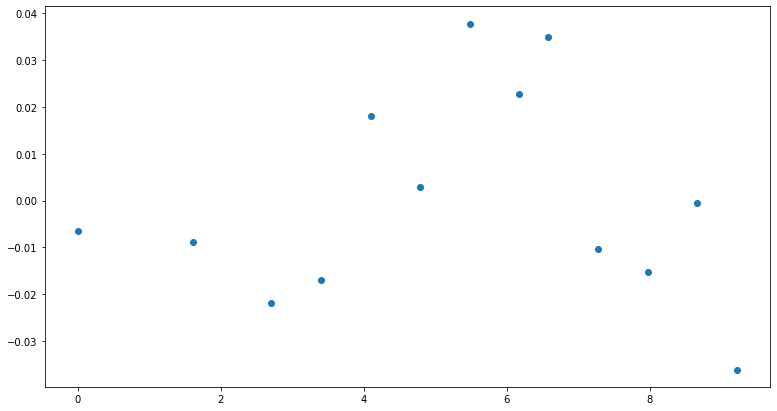

In [153]:
res=prop-logmod
fig()
#plt.scatter(prop,res)
plt.scatter(logtime,res)
plt.show()

In [154]:
mse = np.sum((prop-pm)**2)/(len(time)-2)
msr = np.sum((logmod-pm)**2)
fstat = msr/mse
pf = 1.-f.cdf(fstat,len(time)-2,1)
print("f = ",fstat, " p = ",pf)

f =  10.888654080299803  p =  0.23249322408981854


# Hands on
* Download some of available example data
* Plot them, try to fit linear model, assess its quality
* Compute $R^2$, t- and f- statistics to see more
* Examine residual graphs
* Suggest data transformation and check the impact

# Non-linear models
* Not everything is linear in the real world
* Not all non-linearity can be solved by model transformation
* Smoking wolf example
$$ v = v_0 e^{-t/T} \qquad x = \frac{v_0}T\left(1-e^{-t/T}\right) $$

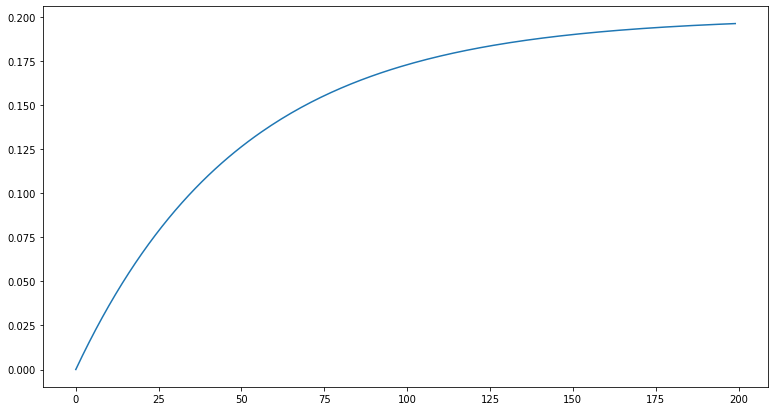

In [155]:
def wolf(t,v0,T):
    return v0/T * (1. - np.exp(-t/T))

t = np.arange(0.,200.,1)
w = wolf(t,10.,50.)
fig()
plt.plot(t,w)
plt.show()

In [156]:
from scipy.optimize import curve_fit
guess=(8.,49.)
#guess=(1.,1.)
par,_ = curve_fit(wolf,t,w,guess)
par

array([10., 50.])

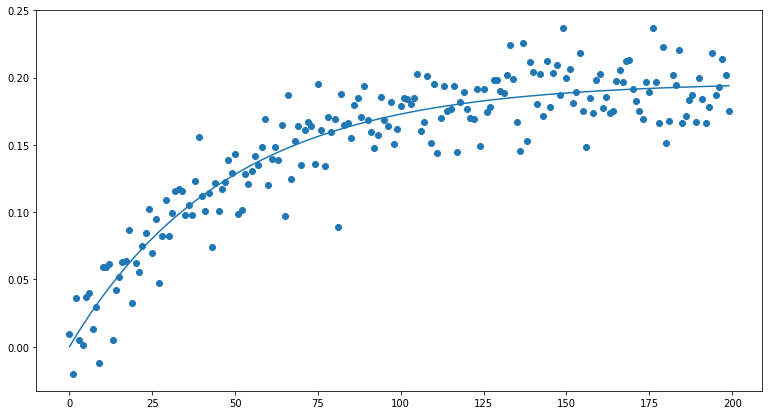

array([ 9.35418301, 47.50688779])

In [157]:
np.random.seed(1234)
#w2 = w + np.random.normal(scale=.01,size=w.shape)
w2 = w + np.random.normal(scale=.02,size=w.shape)
par2,_ = curve_fit(wolf,t,w2,guess)
fig()
plt.scatter(t,w2)
plt.plot(t,wolf(t,*par2))
plt.show()
par2

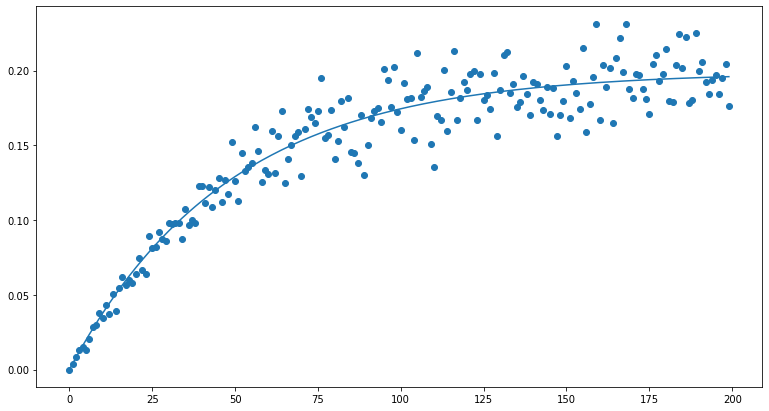

array([ 9.51257404, 47.80503142])

In [158]:
np.random.seed(234)
w3 = w * (1. + np.random.normal(scale=.1,size=w.shape))
par3,_ = curve_fit(wolf,t,w3,guess)
fig()
plt.scatter(t,w3)
plt.plot(t,wolf(t,*par3))
plt.show()
par3

# Sum of exponentials
* Famous "rabbits in a juicy meadow without predators example"
$$ N = N_0 e^{rt} $$
* Mix of two clones -- prudent and relaxed ones
$$ N = N_{a0} e^{r_at} + N_{b0} e^{r_bt} $$

In [159]:
def rabbits(t,N0a,ra,N0b,rb):
    return N0a * np.exp(ra*t) + N0b * np.exp(rb*t)

N = rabbits(t,20,0.004,80,0.009)


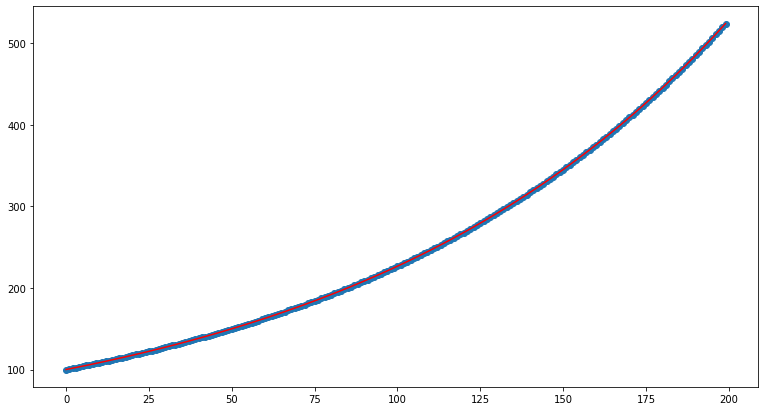

array([8.e+01, 9.e-03, 2.e+01, 4.e-03])

In [160]:
guessr = (25,0.005,75,0.005)
parr,_ = curve_fit(rabbits,t,N,guessr)
fig()
plt.scatter(t,N)
plt.plot(t,rabbits(t,*parr),c='red')
plt.show()
parr

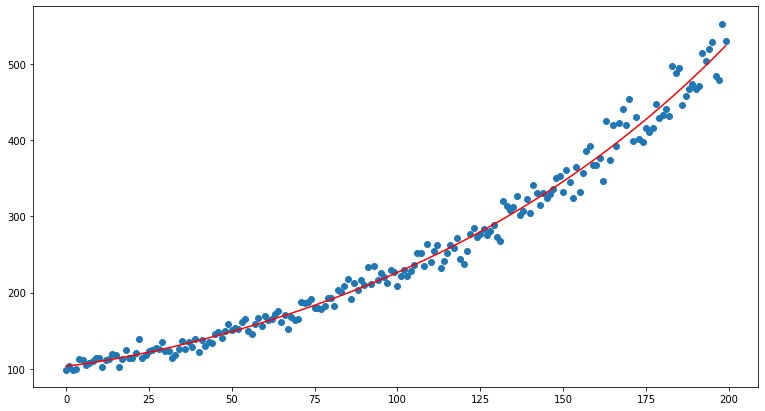

array([ 6.30833761e+00, -4.98993839e-02,  9.70240798e+01,  8.47310142e-03])

In [161]:
np.random.seed(12345)
N2 = N * (1. + np.random.normal(scale=.05,size=N.shape))
parr2,_ = curve_fit(rabbits,t,N2,guessr)
fig()
plt.scatter(t,N2)
plt.plot(t,rabbits(t,*parr2),c='red')
plt.show()
parr2

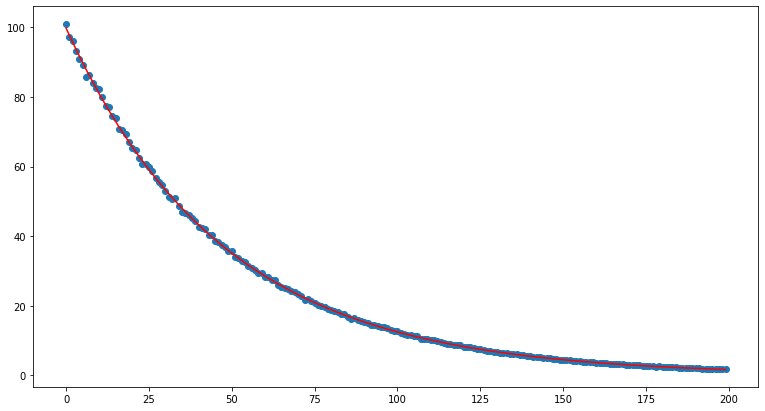

(array([63.06656291, 36.77321985]), array([0.01953597, 0.02348603]))

In [162]:
def cl(x,n1,t1,n2,t2):
    return n1*np.exp(-x/t1) + n2*np.exp(-x/t2)

c = cl(t,20,40,80,50) * (1. + np.random.normal(scale=.01,size=t.shape))

# https://github.com/khuston/pyfitdecay
from diffevol import *
parc = ExpFitDiffEvol(2,t,c)

fig()
plt.scatter(t,c)
plt.plot(t,cl(t,parc[0][0],1./parc[1][0],parc[0][1],1./parc[1][1]),c='red')
plt.show()
parc